In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

In [2]:
#X is the last 2 columns 
X = iris.data[:, [2,3]] 
y = iris.target

np.unique(y)

array([0, 1, 2])

In [3]:
# Splitting data into training and testing
# stratify = y ensures that the data splitting maintains the same proportion in the response variable

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify=y)

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#The mean and std. deviation is of X_train

In [5]:
#Fitting the model using the training data
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0 = 0.1, random_state = 1)

ppn.fit(X_train_std, y_train)


Perceptron(eta0=0.1, random_state=1)

In [6]:
#y_pred is a vector with all the predicted values.
y_pred = ppn.predict(X_test_std)

In [7]:
# The below code will output the number of values that are different in predicted values and actual values
(y_test != y_pred).sum()

1

In [8]:
#calculating the accuracy score

from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.9777777777777777

In [9]:
#plotting the data

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='Test set')

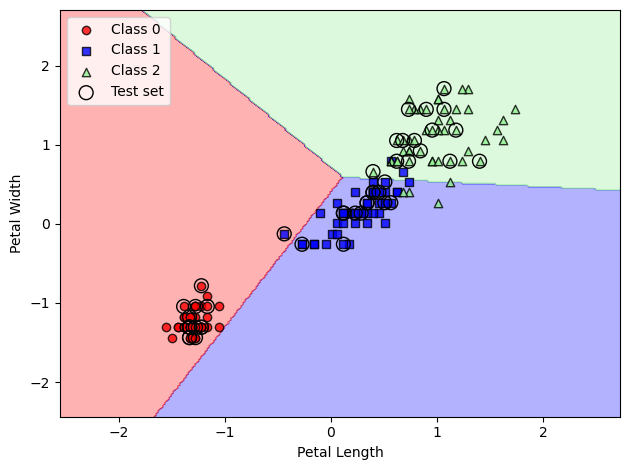

In [10]:
X_combined_std = np.vstack((X_train_std, X_test_std))

y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx = range(105, 150))

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

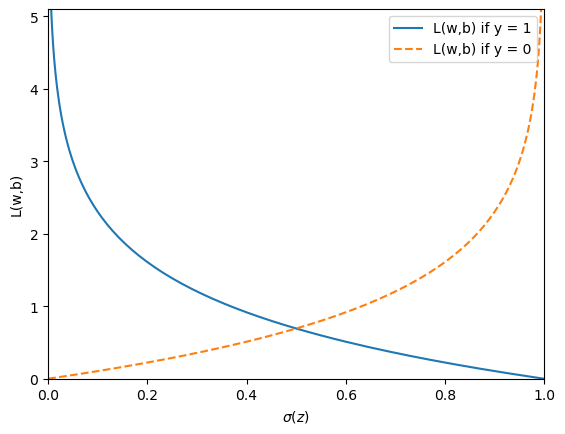

In [11]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

def loss_1(z):
    return -np.log(sigmoid(z))

def loss_0(z):
    return -np.log(1-sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)

c1 = [loss_1(x) for x in z]

plt.plot(sigma_z, c1, label = 'L(w,b) if y = 1')

c0 = [loss_0(x) for x in z]

plt.plot(sigma_z, c0, linestyle='--', label = 'L(w,b) if y = 0')

plt.ylim(0, 5.1)
plt.xlim([0,1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w,b)')
plt.legend(loc = 'best')
plt.show()


In [12]:
class LogisticRegressionGD:
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        
        self.w_ = rgen.normal(loc = 0, scale = 0.01, size = X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            
            self.w_ += self.eta * 2.0 * X.T.dot(errors)/X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            
            loss = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1-output)))/X.shape[0])
            
            self.losses_.append(loss)
        
        return self
    
    def net_input(self, X):
        
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, z):
        return 1/(1 + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

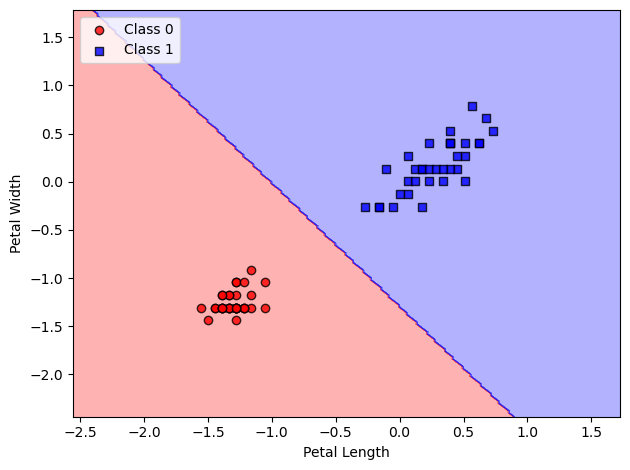

In [13]:
X_train01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta = 0.3, n_iter=1000, random_state=1)

lrgd.fit(X_train01_subset, y_train01_subset)

plot_decision_regions(X = X_train01_subset, y = y_train01_subset, classifier=lrgd)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

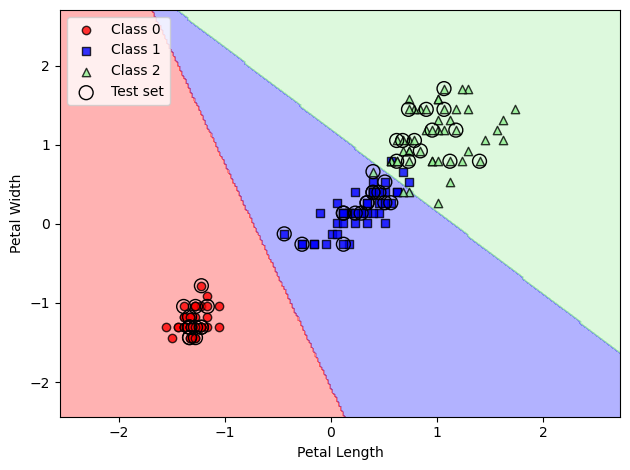

In [14]:
#Logistic Regression with sklearn

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 100, solver = 'lbfgs', multi_class='ovr')

lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [15]:
# First row -> probabilities of the first flower
# Second row -> probabilities of the second flower
# Third row -> probabilities of the third flower
# of the testing dataset.
# For example, there 0.85% chance that the first flower is 2, there is 0.83% chance that second flower is 0

lr.predict_proba(X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [16]:
# Which flower the rows are most likely. 0, 1, 2 correspond to flowers

lr.predict_proba(X_test_std[:3, :]).argmax(axis = 1)

array([2, 0, 0])

In [17]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [18]:
#Notice for argmax of predict_proba and predict is the same

lr.predict_proba(X_test_std).argmax(axis = 1) != lr.predict(X_test_std)
(lr.predict_proba(X_test_std).argmax(axis = 1) != lr.predict(X_test_std)).sum()

0

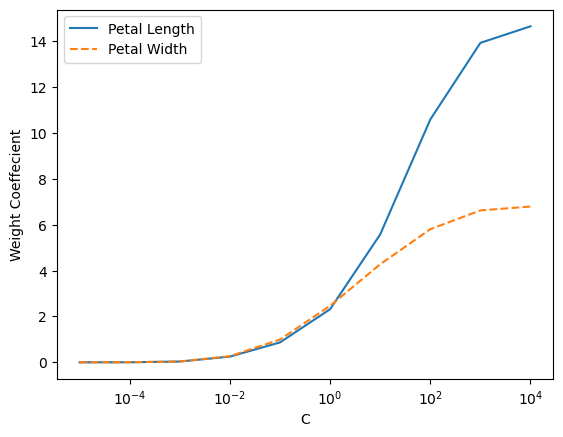

In [19]:
weights = []
params = []

for c in np.arange(-5, 5):
    
    lr = LogisticRegression(C = 10.**c, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    
    #The 2 here represents the flower
    weights.append(lr.coef_[2])
    params.append(10.**c)
    
weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label = 'Petal Length')

plt.plot(params, weights[:, 1], linestyle = '--', 
        label = 'Petal Width')

plt.ylabel('Weight Coeffecient')
plt.xlabel("C")
plt.legend(loc = 'upper left')
plt.xscale('log')

In [37]:
#Further experiment with C. Want to know how does C effect prediction power. 

for i in np.arange(-5, 6):
    lr1 = LogisticRegression(C = 10.**i, multi_class='ovr')
    lr1.fit(X_train_std, y_train)
    y_logPred = lr1.predict(X_test_std)

    print(i, (y_logPred != y_test).sum())

-5 15
-4 15
-3 15
-2 14
-1 8
0 1
1 0
2 1
3 1
4 1
5 1


In [32]:
np.arange(-5, 6)

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

In [20]:
lr.coef_

array([[-10.85522339,  -8.47746807],
       [  2.4424029 ,  -2.10629411],
       [ 14.65216005,   6.7948242 ]])

In [21]:
lr.coef_[1]

array([ 2.4424029 , -2.10629411])

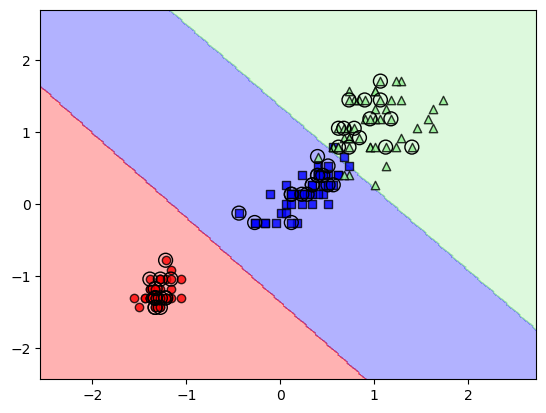

In [22]:
#SVM, Support Vector Machine. To find an area with all possible classification lines

# Slack Variable, also known as C. Large C -> higher penalties, ie more strict about misclassification error for SVM area

from sklearn.svm import SVC

svm = SVC(kernel = 'linear', C = 1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, 
                     y_combined, classifier=svm, test_idx=range(105, 150))

In [23]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss = 'perceptron')
lr = SGDClassifier(loss = 'log')
svm = SGDClassifier(loss = 'hinge')

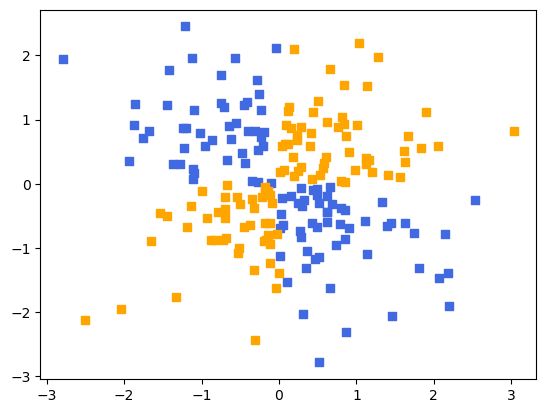

In [24]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)

X_xor = np.random.randn(200,2)

#XOR operator. Only true if either one is true. if both true, outputs false
y_xor = np.logical_xor(X_xor[:,0] > 0,
                      X_xor[:,1] > 0)

#Converting boolean into 0 and 1
y_xor = 1*y_xor

#[y_xor == 1, 0] -> first column of X_xor, where y_xor is 1. 
#[y_xor == 1, 1] -> second column of X_xor, where y_xor is 1. 
#[y_xor == 0, 0] -> first column of X_xor, where y_xor is 0. 
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c = 'royalblue', marker = 's', label = 'Class 1')
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1], c = 'orange', marker = 's', label = 'Class 2')
plt.show()


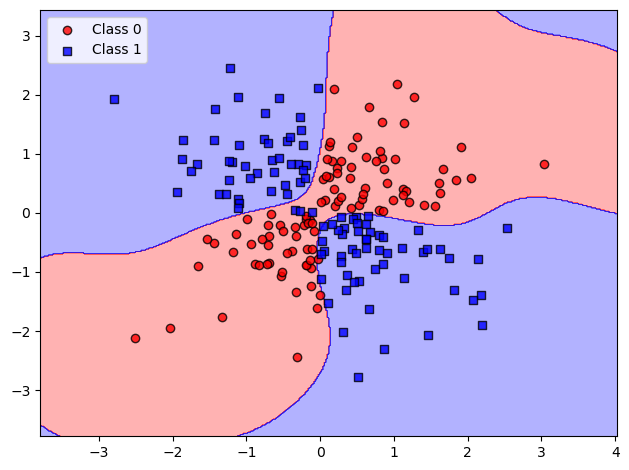

In [25]:
svm = SVC(kernel = 'rbf', random_state=1, gamma = 0.7, C = 10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

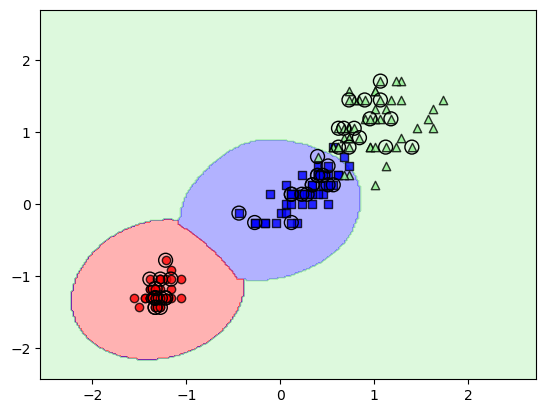

In [26]:
svm = SVC(kernel = 'rbf', random_state=1, gamma = 2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))

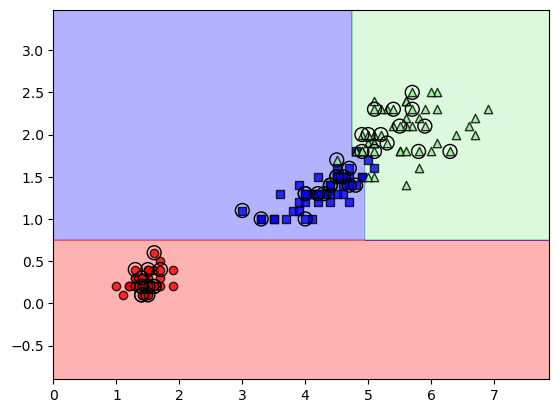

In [27]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', max_depth = 4, random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree_model, test_idx=range(105, 150))

[Text(0.25, 0.9, 'x[1] <= 0.75\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.125, 0.7, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.375, 0.7, 'x[0] <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.5, 0.5, 'x[1] <= 1.75\ngini = 0.219\nsamples = 40\nvalue = [0, 5, 35]'),
 Text(0.25, 0.3, 'x[0] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.375, 0.1, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.3, 'x[0] <= 4.85\ngini = 0.061\nsamples = 32\nvalue = [0, 1, 31]'),
 Text(0.625, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]')]

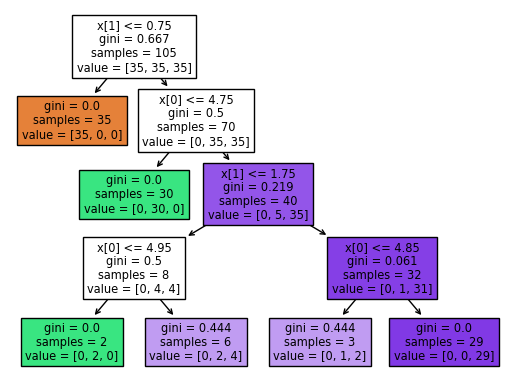

In [28]:
from sklearn import tree

tree.plot_tree(tree_model, filled = True)

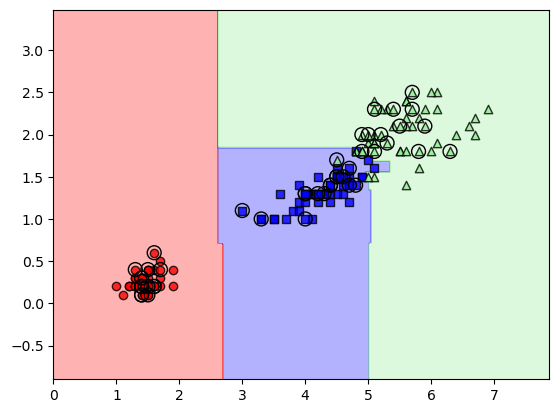

In [29]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))

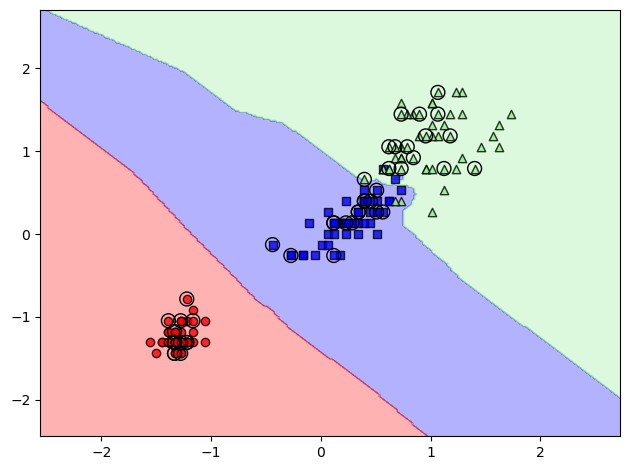

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric = 'minkowski')

knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.tight_layout()
plt.show()

In [49]:
size_mapping = {'XL': 3,'L': 2,'M': 1}

In [51]:
for key, value in size_mapping.items():
    print(value, key)

3 XL
2 L
1 M


In [52]:
inverse_size_mapping = {}

for key, value in size_mapping.items():
    inverse_size_mapping[value] = key
    
inverse_size_mapping


{3: 'XL', 2: 'L', 1: 'M'}

In [43]:
for i in size_mapping:
    print(size_mapping[i])

3
2
1


array([0, 1, 2])